# Solow model with land (måske rettes lidt til)

Imports and set magics:

In [1]:
from __future__ import print_function
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# The standard Solow model

We consider the standard Solow model with a Cobb-Douglas production function: 
$$ Y_t=K_t^{\alpha}(A_tL_t)^{1-\alpha}, 0<\alpha<1 $$

* $Y_t$ is GDP
* $K_t$ is capital 
* $L_t$ is labor 
 * growing with a constant rate of $n$: $L_{t+1}=(1+n)L_t, n\geq0$
* $A_t$ is technology 
 * growing with a constant rate of $g$: $A_{t+1}=(1+g)A_t, g\geq0$ 





Saving is a constant fraction of GDP

$$ 
S_t = sY_t, 0<s<1
$$

such that capital accumulation is savings and undepreciated capital: 

$$
K_{t+1}=S_t+(1-\delta)K_t, 0<\delta<1
$$


We define the technology adjusted capital-labour ratio as 

$$\tilde{k_{t+1}}=\frac{K_{t+1}}{L_{t+1}A_{t+1}} $$

The transition equation becomes:
$$
\tilde{k_{t+1}}=\frac{1}{(1+n)(1+g)}*(s\tilde{k_t^\alpha}+(1-\delta)\tilde{k_t})
$$

We know that steady state requires $k_{t+1}=k_t$

# SOLVE MED SYMPY

## Graphical analysis 

In [2]:
def intersection(lst1,lst2):
        temp = set(lst2)
        test = [value for value in lst1 if value in temp]
        return test

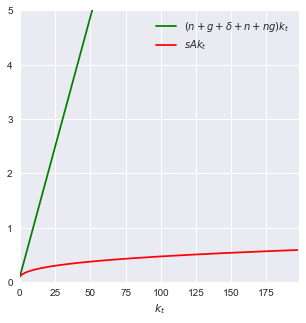

In [3]:
# a. create function for generating solow diagram
def solow(c,alpha,delta,s,n,g):
    '''Function for creating the solow diagram

    input:
    c = capital
    alpha = 
    delta = deprication of capital
    s = rate of saving
    n = population growth 
    g = technologic growth

    output:
    Depriciation of capital 
    Kapital growth
    '''

    #i. create empty lists
    Deprication = []
    Capital = []

    # ii. create loop which adds values for deprication of capital
    for c in range(1,c):
        Deprication.append((n+g+delta+n*g)*c)
        
    # iii. create loop which adds values for growth of capital
    for c in range(1,c):
        Capital.append(s*(c**alpha))

    # iv. plot in figure
    plt.style.use('seaborn') 
    plt.figure(figsize=(5,5))
    plt.plot(Deprication, label = '$(n+g+\delta+n+ng)k_t$', color = 'g')
    plt.plot(Capital, label = '$sAk_t$', color = 'r')
    plt.grid(True)
    plt.ylim(0,5)
    plt.xlim(0,c)
    plt.xlabel('$k_t$')
    plt.legend()
    plt.legend()
    return plt.show()

# # b. call function with fixed parameters
solow(200,1/3,0.05,0.101,0.025,0.02)

We choose to create an interactive version of the above figure where it is possible to change the deprication, saving, population - and technologic growth

In [4]:
widgets.interact(solow,
    c = widgets.fixed(200),
    alpha = widgets.fixed(1/3), 
    delta = widgets.FloatSlider(description = 'd' , min = 0.01, max = 0.1, step=0.01, value=0.05), 
    s = widgets.FloatSlider(description = 's', min=0.1, max=0.9, step = 0.1, value= 0.1),  
    n = widgets.FloatSlider(description = 'n', min = 0.01, max = 0.1, step = 0.01, value = 0.025),
    g = widgets.FloatSlider(description = 'g', min = 0.01, max = 0.1, step = 0.01, value = 0.02))

interactive(children=(FloatSlider(value=0.05, description='d', max=0.1, min=0.01, step=0.01), FloatSlider(valu…

<function __main__.solow(c, alpha, delta, s, n, g)>

skriv noget her Ring. Bare hvad der sker når man rykker de forskellige parameter. Find noget i slides

# Model extension

We consider the Solow model with land. 

We assume the production function is Cobb-Douglas: 
$$Y_t=K_t^{\alpha}(A_tL_t)^{\beta}X^{\kappa}, \alpha>0, \beta>0, \kappa>0, \alpha+\beta+\kappa=1$$
where: 
* $Y_t$ is GDP
* $K_t$ is capital 
* $L_t$ is labor 
 * growing with a constant rate of $n$: $L_{t+1}=(1+n)L_t, n\geq0$
* $A_t$ is technology 
 * growing with a constant rate of $g$: $A_{t+1}=(1+g)A_t, g\geq0$
* $X$ is land
 * constant

Saving is a constant fraction of GDP

$$ 
S_t = sY_t,\,s\in(0,1)
$$

such that capital accumulation is savings and undepreciated capital: 

$$
K_{t+1}=S_t+(1-\delta)K_t, 0<\delta<1
$$

We assume that economy converges towards a steady state in which the capital-output ratio is constant: 
$$
z_t=\frac{K_t}{Y_t}=\frac{k_t}{y_t}
$$

The trasition equation is:
$$
z_{t+1}=\frac{1}{((1+g)(1+n))^\beta} [s+z_t(1-\delta)]^{1-\alpha}z_t^{\alpha}
$$

# Steady state
First we define the sympy symbols:

In [5]:
alpha = sm.symbols('alpha')
delta = sm.symbols('delta')
beta = sm.symbols('beta')
kappa = sm.symbols('kappa')
s = sm.symbols('s')
g = sm.symbols('g')
n = sm.symbols('n')
z = sm.symbols('z')

## Analytical solution
We define the steady state equation: 

In [6]:
ss = sm.Eq(z, s/((((1+n)*(1+g))**(beta/(beta+kappa)))-(1-delta))) #Turns SS into a sympy equation
kss = sm.solve(ss,z)[0] #Solve it by sympy
ss_func = sm.lambdify((s,g,n,beta,kappa,delta),kss) # Turns it into a Python function

We call the function for given parameters: 

In [7]:
ss_func(0.2,0.02,0.01,0.6,0.2,0.05)

2.75612860781496

Skriv måske noget her

## Numerical analysis
If we rewrite the transition equation it clearly becomes a root-finding problem: 

$$
0=\frac{1}{((1+g)(1+n))^\beta} [s+z*(1-\delta)]^{1-\alpha}z*^{\alpha}-z*
$$

In [8]:
# We state the plausible values
alpha = 0.2
beta = 0.6
kappa = 0.2
delta = 0.05
g = 0.02
n = 0.01
s = 0.2

To solve we need an objective function: 

In [9]:
obj_zss = lambda z: z - ((s + z*(1-delta))**(1-alpha)*z**alpha)/(((1+n)*(1+g))**beta)
interval = [0.1,100]

Using Brentq we find the optimal level of capital-output ratio for given parameters:

In [10]:
res  = optimize.root_scalar(obj_zss,bracket=interval,method='brentq')
print(res)

converged: True
           flag: 'converged'
 function_calls: 7
     iterations: 6
           root: 2.7561286078149587


We call the two solutions and compare: 

In [11]:
print(f'analytical solution is: {ss_func(s,g,n,beta,kappa,delta):.3f}')
print(f'numerical solution is: {res.root:.3f}')

analytical solution is: 2.756
numerical solution is: 2.756


As we can see the solutions are identical with 3 decimals. (Tilføj måske noget her om iterations mm. og konvergens)

## Graphical analysis

We want to analyze capital-ratio output over time so we create the following function:

In [12]:
# a. generate function for transition equation for the capital-output ratio
def trans_eq(Z0,alpha,beta,delta,s,g,n,t):

    '''Function creates a graph based on the transition equation 
    
    input:
    Z0 = capital-ratio output in first period
    alpha = ...
    beta = ...
    delta = deprication
    s = rate of saving
    g = technology growth
    n = population growth
    t = periods
    
    output:
    Z_t1 = capital-ratio output in next period

    '''

     # i. create two empty list 
    Z_t = [Z0]
    Z_t1 = []

    i = 1

    # ii. create a loop which generates two lists for both z_t1 and z_t
    while i <= t:
        Z_t.append(((s+Z_t[-1]*(1-delta))**(1-alpha)*Z_t[-1]**alpha)/(((1+n)*(1+g))**beta)) # Adds to list for z_t
        Z_t1.append(((s+Z_t[-1]*(1-delta))**(1-alpha)*Z_t[-1]**alpha)/(((1+n)*(1+g))**beta)) # Adds to list for z_t1

        i += 1

    # iii. generate plot
    plt.style.use('seaborn')
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(1,1,1)
    ax.plot(Z_t1)
    ax.set_title('Growth in capital-output ratio over time')
    ax.set_xlabel('time')
    ax.set_ylabel('$z_{t+1}$')
    return plt.show()

In [13]:
trans_eq(Z0,alpha,beta,delta,s,g,n,200)

NameError: name 'Z0' is not defined

We want to include an interactive element to our graph so we create the following:

In [ ]:
widgets.interact(trans_eq,
    Z0 = widgets.fixed(1),
    alpha = widgets.fixed(0.2), 
    beta = widgets.fixed(0.6), 
    delta = widgets.FloatSlider(description = 'd' , min = 0.01, max = 0.1, step=0.01, value=0.05), 
    s = widgets.FloatSlider(description = 's', min=0.1, max=0.9, step = 0.1, value= 0.2), 
    g = widgets.FloatSlider(description = 'g', min=0.01, max=0.1, step= 0.01, value=0.02), 
    n = widgets.FloatSlider(description = 'n', min = 0.01, max = 0.1, step = 0.01, value = 0.01), 
    t = widgets.fixed(200))

Tilføj noget her

# Ved ikke om vi skal have dette med. Men vi kan gøre det. Hvordan steady state værdien ændrer sig i takt med n, s.

We want to analyze what happens with the steady state value based on a change in savings rate and population growth 

In [ ]:
# a. creates a list for savings rate and a list for population growth
s_list = np.linspace(0.1,1,num=10, endpoint=True)
results_s = []

n_list = np.linspace(0.01,0.05,num=10, endpoint=True)
results_n = []

# b. create two loops which makes a steady state for each value of savings rate and population growth
for s in s_list:
    res  = optimize.root_scalar(obj_zss,bracket=interval,method='brentq')
    results_s.append(res.root)

for n in n_list:
    res  = optimize.root_scalar(obj_zss,bracket=interval,method='brentq')
    results_n.append(res.root)

# c. create figure for both results
plt.style.use('seaborn')
fig = plt.figure(figsize=(10,4))

# d. figure based on savings
ax_s = fig.add_subplot(1,2,1)
ax_s.scatter(s_list,results_s)
ax_s.set_title('Steady state based on rate of savings')
ax_s.set_xlabel('s')
ax_s.set_ylabel('$z^*$')
ax_s.grid(True)

# e. figure based on population growth
ax_n = fig.add_subplot(1,2,2)
ax_n.scatter(n_list,results_n)
ax_n.set_title('Steady state based on population growth')
ax_n.set_xlabel('n')
ax_n.set_ylabel('$z^*$')
ax_n.grid(True)

# Conclusion